In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly

In [ ]:
!pip install kaggle
import os

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
kaggle datasets download -d roche-data-science-coalition/uncover

In [ ]:
!unzip roche-data-science-coalition/uncover.zip 

In [ ]:
dataset_indicators= pd.read_csv("/uncover/UNCOVER/HDE_update/inform-covid-indicators.csv")
dataset_covid19_cases = pd.read_csv("/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv")
dataset_covid_test_performed= pd.read_csv("/uncover/UNCOVER/HDE_update/HDE/total-covid-19-tests-performed-by-country.csv")

## Displaying data from different datasets

In [ ]:
dataset_indicators.tail(10)

,country,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,proportion_of_population_with_basic_handwashing_facilities_on_premises,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_health_conditions,inform_epidemic_vulnerability,mortality_rate_under_5,prevalence_of_undernourishment,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio
181,United Kingdom,GBR,1.8,3.2,274.83,83.397999999999996,No data,99.11029,2.2,0.3,5.2,4.3000001907348597,2.4,1.5,1.1000000000000001,1.3,28.06,4177.81,9.00
182,United States of America,USA,3.4,2.8,35.77,82.256,No data,99.97002,2.9,0.1,5.7,6.5999999046325701,2.4,2.1,1.1000000000000001,1.1,25.95,9869.74,14.00
183,Uruguay,URY,1.8,2.9,19.71,95.334000000000003,No data,96.59619,2.0,0.6,5.1,8.1999998092651403,2.4,2.8,1.2,2.1,50.50,1958.90,15.00
184,Uzbekistan,UZB,3.1,3.3,77.47,50.478000000000002,No data,100.00000,1.9,0.6,4.2,22.5,6.3,4.0,3.3,3.0,23.68,416.90,36.00
185,Vanuatu,VUT,4.1,4.7,24.01,25.274000000000001,25.21,34.06706,4.1,3.7,3.9,26.899999618530298,7.2,5.7,5.7,6.3,1.71,116.09,78.00
186,Venezuela,VEN,4.6,3.3,32.73,88.207999999999998,No data,93.93502,3.5,1.2,4.9,30.899999618530298,21.2,4.5,4.8,2.7,No data,940.00,95.00
187,Viet Nam,VNM,3.8,4.2,308.13,35.918999999999997,85.85,83.51505,2.2,1,7.5,20.899999618530298,9.3,4.4,4.5999999999999996,2.5,8.20,356.28,54.00
188,Yemen,YEM,8.1,6.3,53.98,36.642000000000003,49.54,59.05300,8.2,1.2,4.5,55.400001525878899,38.9,7.8,7.4,6.8,3.10,144.50,385.00
189,Zambia,ZMB,4.3,6.8,23.34,43.521000000000001,13.94,26.37012,5.9,7.4,6.2,60,46.7,6.0,6.1,4.8,0.91,175.18,224.00
190,Zimbabwe,ZWE,5.1,4.9,37.32,32.209000000000003,36.79,36.22140,5.4,6.1,6.8,50.299999237060497,51.3,5.9,6.6,4.4,0.76,185.05,443.00


In [ ]:
dataset_covid19_cases.tail(3)

,country_region,last_update,lat,long,confirmed,deaths,recovered,active
180,Western Sahara,2020-04-05 18:24:16,24.215500,-12.885800,4,0,0,4
181,Zambia,2020-04-05 18:24:16,-13.133897,27.849332,39,1,3,35
182,Zimbabwe,2020-04-05 18:24:16,-19.015438,29.154857,9,1,0,8


In [ ]:
dataset_covid_test_performed.tail(5)

,entity,code,year,total_covid_19_tests
72,United Arab Emirates,ARE,55,125000
73,United Kingdom,GBR,58,64621
74,United States,USA,58,103945
75,United States - CDC samples tested,NaN,53,37646
76,Vietnam,VNM,59,15637


## Aggregating the cases by countries to get the latest confirmed cases, deaths and recovered cases

In [ ]:
dataset_confirmed_cases_by_country = dataset_covid19_cases[['country_region', 'confirmed', 'deaths', 'recovered', 'active']]

In [ ]:
#Grouped the confirmed cases, deatjs and recovered cases by country
dataset_confirmed_cases_by_country=dataset_confirmed_cases_by_country.groupby(['country_region']).sum()
dataset_confirmed_cases_by_country.tail(10)

,confirmed,deaths,recovered,active
country_region,,,,
United Arab Emirates,1798,10,144,1644
United Kingdom,48406,4943,229,43234
Uruguay,400,5,93,302
Uzbekistan,310,2,30,278
Venezuela,155,7,52,96
Vietnam,241,0,90,151
West Bank and Gaza,234,1,23,210
Western Sahara,4,0,0,4
Zambia,39,1,3,35


In [ ]:
#resetting the index
dataset_confirmed_cases_by_country=dataset_confirmed_cases_by_country.reset_index()
dataset_confirmed_cases_by_country.tail(10)

,country_region,confirmed,deaths,recovered,active
173,United Arab Emirates,1798,10,144,1644
174,United Kingdom,48406,4943,229,43234
175,Uruguay,400,5,93,302
176,Uzbekistan,310,2,30,278
177,Venezuela,155,7,52,96
178,Vietnam,241,0,90,151
179,West Bank and Gaza,234,1,23,210
180,Western Sahara,4,0,0,4
181,Zambia,39,1,3,35
182,Zimbabwe,9,1,0,8


## Plotting the confirmed cases on the world map

In [ ]:
data = [dict(type='choropleth',
             locations = dataset_confirmed_cases_by_country['country_region'].astype(str),
             z=dataset_confirmed_cases_by_country['confirmed'].astype(int),
             locationmode='country names')]


fig = dict(data=data, 
           layout_title_text="COVID-19 Confirmed cases")


plotly.offline.iplot(fig)

## Plotting the no. of test performed across different countries

In [ ]:
data = [dict(type='choropleth',
             locations = dataset_covid_test_performed['entity'].astype(str),
             z=dataset_covid_test_performed['total_covid_19_tests'].astype(int),
             locationmode='country names')]

fig = dict(data=data, 
           layout_title_text="COVID-19 test performed")

plotly.offline.iplot(fig)

## Matching Country Names from Covid cases and data indicator file to join the datasets

In [ ]:
# cleaning the country names for joining
dataset_confirmed_cases_by_country.loc[dataset_confirmed_cases_by_country.country_region=='US','country_region']='United States of America'
dataset_indicators.loc[dataset_indicators.country=='Viet Nam','country']='Vietnam'
dataset_indicators.loc[dataset_indicators.country=='Russian Federation','country']='Russia'
dataset_indicators.loc[dataset_indicators.country=='Korea Republic of','country']='Korea, South'
dataset_indicators.loc[dataset_indicators.country=='Moldova Republic of','country']='Moldova'
dataset_covid_test_performed.loc[dataset_covid_test_performed.entity=='United States','entity']='United States of America'

In [ ]:
#replace No Data with 0
dataset_indicators=dataset_indicators.replace("No data", 0)

In [ ]:
#renaming country column name to country_region for joing the two dataframes
dataset_indicators.columns=['country_region', 'iso3', 'inform_risk',
       'inform_p2p_hazard_and_exposure_dimension', 'population_density',
       'population_living_in_urban_areas',
       'proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services',
       'inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5',
       'prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare',
       'inform_epidemic_lack_of_coping_capacity', 'physicians_density',
       'current_health_expenditure_per_capita', 'maternal_mortality_ratio']

##  Outer join between cases in different countries and countries health indicators
##  Left join the resultant dataset with no. of test performd in different countries

In [ ]:
# outer join between cases in different countries and countries health indicators
data_tmp=pd.merge(dataset_confirmed_cases_by_country,dataset_indicators,  on='country_region', how='outer')
data_tmp=pd.merge(data_tmp,dataset_covid_test_performed,  left_on='country_region', right_on='entity',how='left')
data_tmp.tail(2)

,country_region,confirmed,deaths,recovered,active,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,...,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio,entity,code,year,total_covid_19_tests
206,Vanuatu,NaN,NaN,NaN,NaN,VUT,4.1,4.7,24.01,25.274000000000001,...,5.7,5.7,6.3,1.71,116.09,78.00,NaN,NaN,NaN,NaN
207,Yemen,NaN,NaN,NaN,NaN,YEM,8.1,6.3,53.98,36.642000000000003,...,7.8,7.4,6.8,3.10,144.50,385.00,NaN,NaN,NaN,NaN


In [ ]:
#Cleaning the NaN data and data with x
data_tmp=data_tmp.replace(np.nan, 0)
data_tmp=data_tmp.replace('x', 0)
data_tmp.tail(40)

,country_region,confirmed,deaths,recovered,active,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,...,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio,entity,code,year,total_covid_19_tests
168,Tunisia,574.0,22.0,5.0,547.0,TUN,3.2,4.0,74.44,68.944999999999993,...,4.7,3.8,4.6,12.72,806.34,62.00,0,0,0.0,0.0
169,Turkey,27069.0,574.0,1042.0,25453.0,TUR,5.0,4.2,106.96,75.143000000000001,...,3.2,3.3,2.3,17.61,1089.24,16.00,Turkey,TUR,49.0,2900.0
170,United States of America,325185.0,9267.0,16820.0,0.0,USA,3.4,2.8,35.77,82.256,...,2.1,1.1000000000000001,1.1,25.95,9869.74,14.00,United States of America,USA,58.0,103945.0
171,Uganda,48.0,0.0,0.0,48.0,UGA,6.5,7.2,213.06,23.774000000000001,...,7.2,6.5,5.7,0.91,117.11,343.00,0,0,0.0,0.0
172,Ukraine,1251.0,32.0,25.0,1194.0,UKR,4.7,2.6,77.03,69.352000000000004,...,4.8,4.2,5.1,30.07,534.19,24.00,Ukraine,UKR,59.0,316.0
173,United Arab Emirates,1798.0,10.0,144.0,1644.0,ARE,1.9,4.4,135.61,86.522000000000006,...,1.9,1.5,1.1,23.94,2546.19,6.00,United Arab Emirates,ARE,55.0,125000.0
174,United Kingdom,48406.0,4943.0,229.0,43234.0,GBR,1.8,3.2,274.83,83.397999999999996,...,1.5,1.1000000000000001,1.3,28.06,4177.81,9.00,United Kingdom,GBR,58.0,64621.0
175,Uruguay,400.0,5.0,93.0,302.0,URY,1.8,2.9,19.71,95.334000000000003,...,2.8,1.2,2.1,50.50,1958.90,15.00,0,0,0.0,0.0
176,Uzbekistan,310.0,2.0,30.0,278.0,UZB,3.1,3.3,77.47,50.478000000000002,...,4.0,3.3,3.0,23.68,416.90,36.00,0,0,0.0,0.0
177,Venezuela,155.0,7.0,52.0,96.0,VEN,4.6,3.3,32.73,88.207999999999998,...,4.5,4.8,2.7,0,940.00,95.00,0,0,0.0,0.0


In [ ]:
#createing dataset with numeric values
data_k =data_tmp[['total_covid_19_tests', 'confirmed', 'deaths', 'recovered', 'active',
                  'inform_risk', 'inform_p2p_hazard_and_exposure_dimension',
       'population_density', 'population_living_in_urban_areas',
       'proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services',
       'inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5',
       'prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare',                
       'current_health_expenditure_per_capita', 'maternal_mortality_ratio']]

## KMeans clustering to identify countries with similar risk level for Covid-19

Text(0.5, 0, 'No. of clusters')

Text(0, 0.5, ' Within Cluster Sum of Squares')

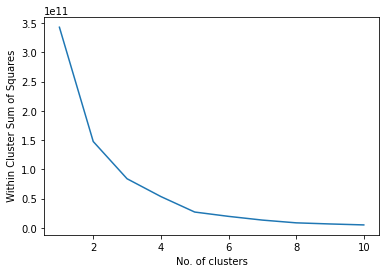

In [ ]:
from sklearn.cluster import KMeans
#calculating WCSS which is the sum of squares of the distances of each data point represeting a country
#in all clusters to their respective centroids
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(data_k)
    wcss.append(y_means.inertia_)
#Plotting WCSS to find the number of clusters
plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel(" Within Cluster Sum of Squares")
plt.show()

1. ##### Grouping countries into 5 different clusters based on no. of test performed, cases confirmed, deaths and recovered cases and different health indicators showing the health care condition

In [ ]:
kmeans_covid = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(data_k)

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_k)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data_k['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_k.groupby('cluster').mean(),1))
kmeans_mean_cluster

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_covid_19_tests,confirmed,deaths,recovered,active,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_epidemic_vulnerability,prevalence_of_undernourishment,inform_lack_of_coping_capacity
cluster,,,,,,,,,,,,,
1,1721.9,1399.1,48.2,198.2,1095.9,3.5,4.1,190.5,67.4,3.4,4.7,11.1,4.2
2,186943.0,113860.0,8707.0,25257.5,79895.5,2.3,2.8,221.4,99.0,3.0,5.2,2.4,1.8
3,42273.6,82172.2,6374.4,30169.8,45628.0,3.2,3.5,137.9,94.2,3.0,5.1,4.1,2.6
4,127378.0,4291.3,30.0,418.7,3842.7,2.7,3.1,49.2,96.4,2.0,4.6,2.5,2.8
5,103945.0,325185.0,9267.0,16820.0,0.0,3.4,2.8,35.8,100.0,2.9,5.7,2.4,2.1


##### 5 groups of countries with different risk levels
## Group 1: Countries like India, Denmark, Canada, Ecuador, Brazil, South Africa, etc.
Represents countries with 
* Low no. of test performed, 
* Less confirmed cases, 
* least deaths
* High population density 
* Presence of undernourishment is higher and basic sanitation is low

## Group 2: Germany and Italy
Represents countries with 
* Highest no. of test performed
* The highest number of active cases
* A high number of deaths
* Highest population density
* Better health care condition

## Group 3: China, France, Iran, Spain, and the United Kingdom
Represents countries with
* Highest no. of test performed
* A relatively high number of active cases
* A relatively high number of deaths
* A relatively high population density
* Better health care condition

## Group 4: Australia, Russia, United Arab Emirates
Represents countries with
* High no. of test performed
* Least number of active cases
* The lowest number of deaths
* A relatively low population density
* Good health care condition
## Group 5: United States of America
Represents countries with
* High no. of test performed
* The highest number of confirmed cases
* The highest number of deaths
* Lowest population density
* Best health care condition

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Covid Clustering')

Text(0.5, 0, 'Test Perfomed by the country')

Text(0, 0.5, 'No. of confirmed cases')

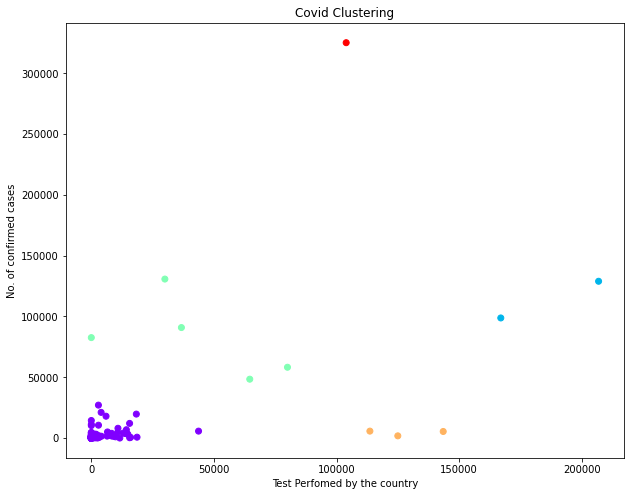

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data_k.iloc[:,0], data_k.iloc[:,1],c=y_kmeans, cmap='rainbow')  # plot points with cluster dependent colors
plt.title('Covid Clustering')
plt.xlabel("Test Perfomed by the country")
plt.ylabel("No. of confirmed cases")
plt.show()

In [ ]:
data_risk= pd.DataFrame()
data_risk["country"]=data_tmp["country_region"]
data_risk["Risk_Level"]=y_kmeans1

In [ ]:

for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jamaica',

## Plotting the groups of countries on world map

In [ ]:
data = [dict(type='choropleth',
             colorscale='reds',
             locations =data_risk['country'].astype(str),
             z= data_risk['Risk_Level'].astype(int),
             locationmode='country names')]

fig = dict(data=data, 
           layout_title_text="Country grouped based on Health care quality, no. of COVID-19 cases and tests performed")

plotly.offline.iplot(fig)

In [ ]:
# considered heath indicators and test perfomed to understand the impact on confirmed COVID-19 cases
names = ['total_covid_19_tests',  
       'inform_risk', 'inform_p2p_hazard_and_exposure_dimension',
       'population_density', 'population_living_in_urban_areas',
       'proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services',
       'inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5',
       'prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare', 'current_health_expenditure_per_capita',
       'maternal_mortality_ratio', 'cluster']

prevalence_of_undernourishment                                            0.142083
current_health_expenditure_per_capita                                     0.110581
proportion_of_population_with_basic_handwashing_facilities_on_premises    0.098256
mortality_rate_under_5                                                    0.087838
population_living_in_urban_areas                                          0.076533
inform_health_conditions                                                  0.071863
cluster                                                                   0.066687
people_using_at_least_basic_sanitation_services                           0.065024
inform_p2p_hazard_and_exposure_dimension                                  0.064535
inform_lack_of_coping_capacity                                            0.062959
inform_access_to_healthcare                                               0.050174
total_covid_19_tests                                                      0.046319
mate

Text(0.5, 1.0, ' Factor impacting COVID-19 deaths')

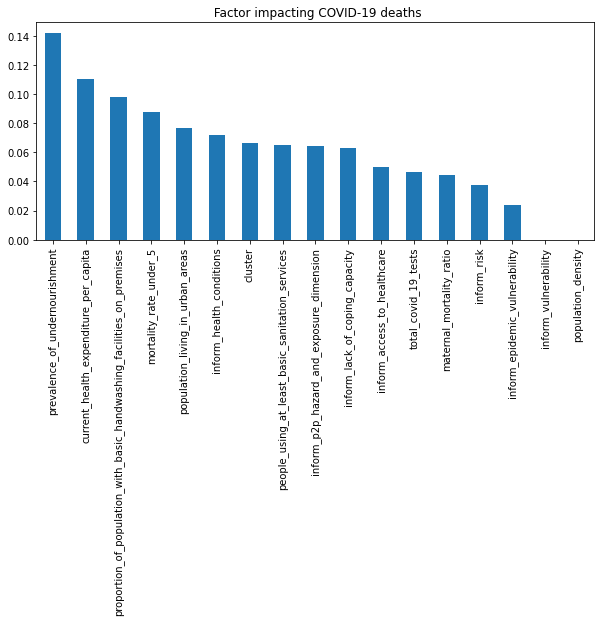

In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
mi = mutual_info_regression(data_k[names], data_k['deaths'] )
mi = pd.Series(mi)
mi.index = names
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.title(" Factor impacting COVID-19 deaths")

In [ ]:
#createing dataset with numeric values
data_health =data_tmp[['inform_risk', 'inform_p2p_hazard_and_exposure_dimension',
       'population_density', 'population_living_in_urban_areas',
       'proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services',
       'inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5',
       'prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare',                
       'current_health_expenditure_per_capita', 'maternal_mortality_ratio']]

Text(0.5, 0, 'No. of clusters')

Text(0, 0.5, ' Within Cluster Sum of Squares')

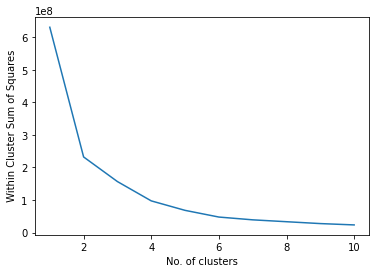

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(data_health)
    wcss.append(y_means.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel(" Within Cluster Sum of Squares")
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_health)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data_health['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_health.groupby('cluster').mean(),1))
kmeans_mean_cluster

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_epidemic_vulnerability,prevalence_of_undernourishment,inform_lack_of_coping_capacity
cluster,,,,,,,,
1,1.6,3.3,224.0,98.8,2.0,5.4,2.4,1.8
2,4.1,4.3,112.4,55.9,3.9,4.6,14.0,4.8
3,2.5,3.4,237.3,95.6,2.1,4.8,4.4,3.1
4,0.5,4.0,7953.0,100.0,0.3,4.5,2.5,1.1
5,2.4,3.2,125.6,99.9,2.6,6.0,2.4,1.5


In [ ]:
group=1
for group in range(1, 6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print(listofcoutries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Japan', 